# Hassan Shah
# Chinese Character Classification Using Neural Networks

## Imports

In [ ]:
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/content/SimHei.ttf')
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
keras.utils.set_random_seed(2023)
tf.config.experimental.enable_op_determinism()

In [ ]:
df = pd.read_csv("/content/xid-79881135_2.csv")

In [ ]:
df.shape

(15000, 4098)

In [ ]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九


In [ ]:
y = df['label']
x = df.drop(columns=['label', 'character']).values.reshape(-1, 64, 64, 1)

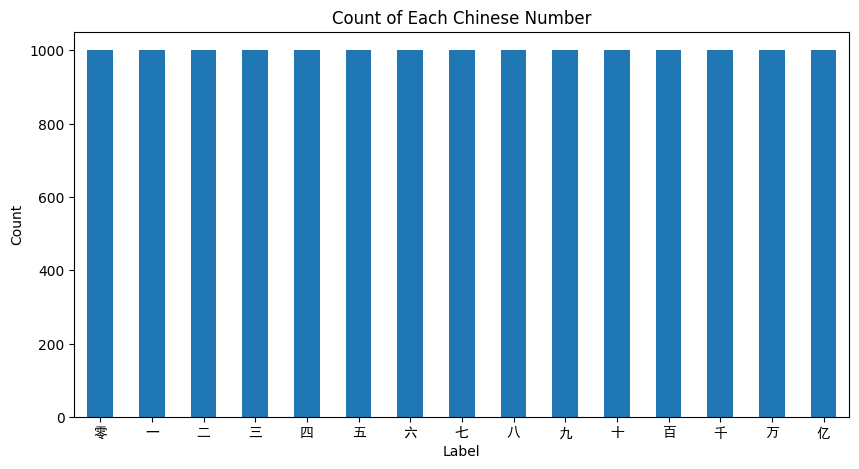

In [ ]:
number_counts = df['character'].value_counts()

ordered_characters = ['零', '一', '二', '三', '四', '五', '六', '七', '八', '九', '十', '百', '千', '万', '亿']

number_counts = number_counts.loc[ordered_characters]

plt.figure(figsize=(10, 5))
number_counts.plot(kind='bar')
plt.xticks(range(len(number_counts.index)), number_counts.index, fontproperties=font, rotation=0)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each Chinese Number')
plt.show()

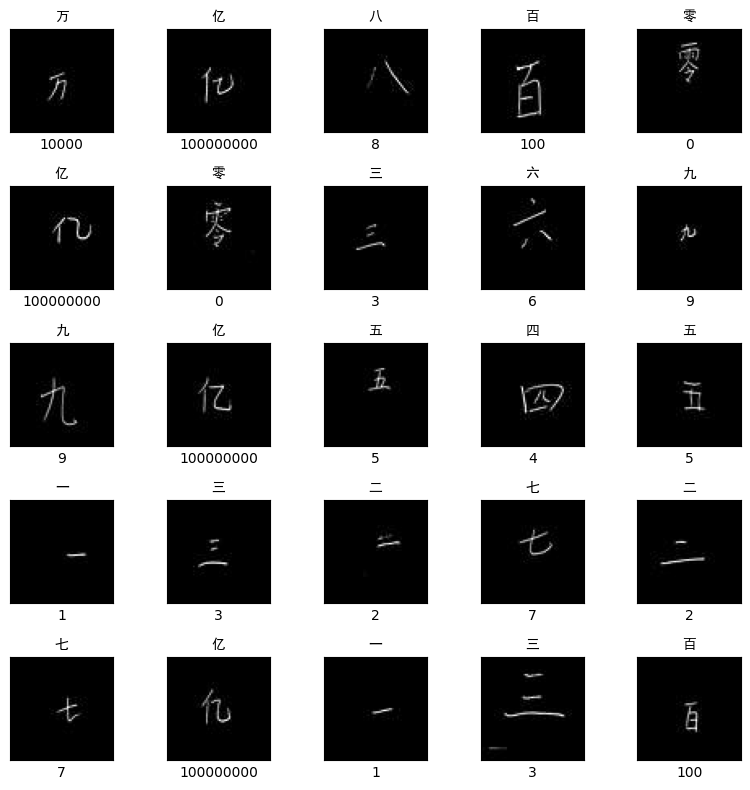

In [ ]:
plt.figure(figsize=[8,8])
for i in range(25):
  idx = np.random.randint(len(x))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title(f"{df['character'].values[idx]}", fontproperties=font)
  plt.imshow(x[idx].reshape(64, 64), cmap="gray")
  plt.xlabel(f"{y[idx]}")
plt.tight_layout()
plt.show()

In [ ]:
x = x/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=2023, stratify=y)

In [ ]:
X_train.shape

(10500, 64, 64, 1)

In [ ]:
y_train.shape

(10500,)

In [ ]:
X_test.shape

(4500, 64, 64, 1)

In [ ]:
y_test.shape

(4500,)

In [ ]:
label_map = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 
             100:11, 1000:12, 10000:13, 100000000:14}

y_train_map = np.array([label_map[val] for val in y_train])
y_test_map = np.array([label_map[val] for val in y_test])

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],
              optimizer = 'Adam')

In [ ]:
history = model.fit(X_train, y_train_map, epochs=25, 
                    validation_data=(X_test, y_test_map))

Epoch 1/25
329/329 [==============================] - 6s 8ms/step - loss: 1.0363 - accuracy: 0.6789 - val_loss: 0.3964 - val_accuracy: 0.8733
Epoch 2/25
329/329 [==============================] - 2s 7ms/step - loss: 0.2626 - accuracy: 0.9147 - val_loss: 0.2315 - val_accuracy: 0.9260
Epoch 3/25
329/329 [==============================] - 2s 7ms/step - loss: 0.1287 - accuracy: 0.9603 - val_loss: 0.1517 - val_accuracy: 0.9511
Epoch 4/25
329/329 [==============================] - 2s 7ms/step - loss: 0.0779 - accuracy: 0.9753 - val_loss: 0.1567 - val_accuracy: 0.9471
Epoch 5/25
329/329 [==============================] - 2s 7ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.1471 - val_accuracy: 0.9527
Epoch 6/25
329/329 [==============================] - 2s 7ms/step - loss: 0.0340 - accuracy: 0.9906 - val_loss: 0.1795 - val_accuracy: 0.9507
Epoch 7/25
329/329 [==============================] - 2s 7ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.1959 - val_accuracy: 0.9402
Epoch 

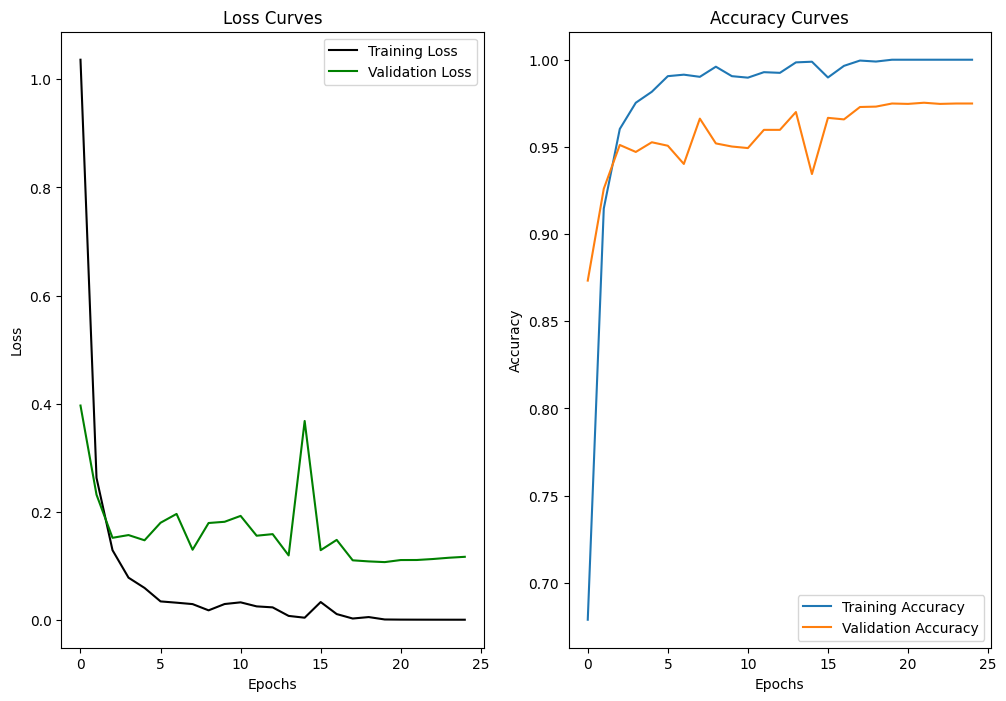

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'black', label='Training Loss')
plt.plot(history.history['val_loss'], 'green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()

1/1 [==============================] - 0s 96ms/step


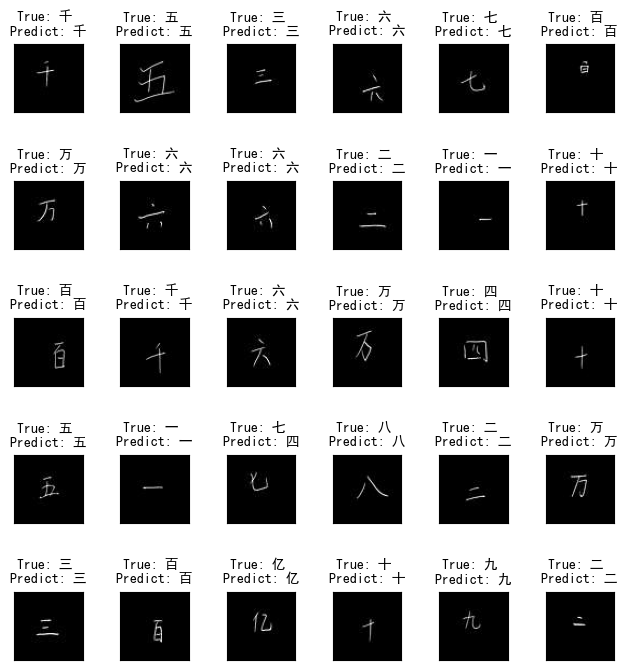

In [ ]:
class_names = {0:'零', 1:'一', 2:'二', 3:'三', 4:'四', 5:'五', 
                      6:'六', 7:'七', 8:'八', 9:'九', 10:'十', 11:'百', 
                      12:'千', 13:'万', 14:'亿'}

pred = model.predict(X_test[:30]) 
pred_classes = np.argmax(pred, axis=1) 

y_true = y_test_map[:30]

plt.figure(figsize=[8,8])

for i in range(30):
        plt.subplot(5, 6, i + 1)
        test_sample = np.array(X_test[i])
        plt.title("True: %s \nPredict: %s" % (class_names[int(y_true[i])], class_names[int(pred_classes[i])]), fontproperties=font)
        plt.imshow(test_sample, cmap="gray")

        plt.xticks([])
        plt.yticks([])
        
plt.subplots_adjust(hspace=1)
plt.show()

141/141 [==============================] - 0s 2ms/step


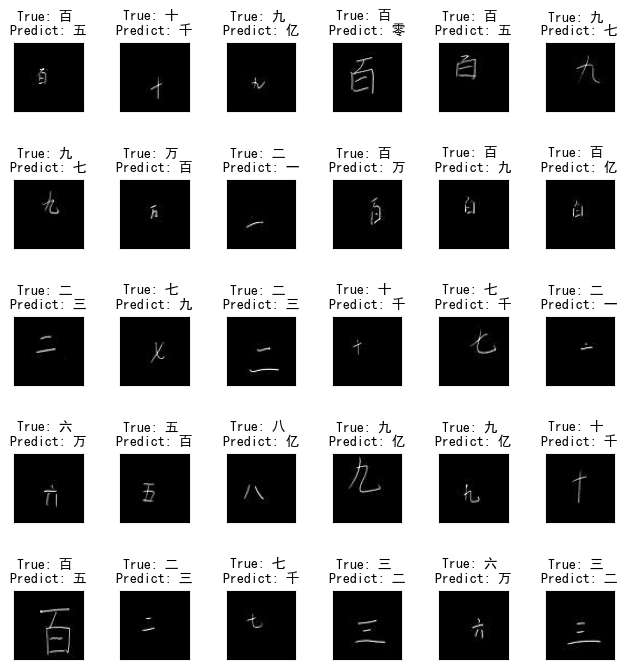

In [ ]:
all_preds = model.predict(X_test)
all_pred_classes = np.argmax(all_preds, axis=1)

misclassified_indices = np.nonzero(all_pred_classes != y_test_map)[0]

random_misclassified_indices = np.random.choice(misclassified_indices, 30, replace=False)

plt.figure(figsize=[8,8])
for i, idx in enumerate(random_misclassified_indices):
    plt.subplot(5, 6, i + 1)
    test_sample = np.array(X_test[idx])
    plt.title("True: %s \nPredict: %s" % (class_names[int(y_test_map[idx])], class_names[int(all_pred_classes[idx])]), fontproperties=font)
    plt.imshow(test_sample, cmap="gray")

    plt.xticks([])
    plt.yticks([])

plt.subplots_adjust(hspace=1)
plt.show()